## Problem I. Data Analytics

In [39]:
#importing necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("data.csv",names=['NativeEngSpeaker','CourseInst','Course', 'Sum/Reg', 'ClassSize', 'ClassAttr'])

In [3]:
#Check the first five row
df.head()

,NativeEngSpeaker,CourseInst,Course,Sum/Reg,ClassSize,ClassAttr
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [4]:
#check the last five rows
df.tail()

,NativeEngSpeaker,CourseInst,Course,Sum/Reg,ClassSize,ClassAttr
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1
150,2,2,10,2,27,1


In [5]:
df.info() #tocheck the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   NativeEngSpeaker  151 non-null    int64
 1   CourseInst        151 non-null    int64
 2   Course            151 non-null    int64
 3   Sum/Reg           151 non-null    int64
 4   ClassSize         151 non-null    int64
 5   ClassAttr         151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [6]:
df.describe()

,NativeEngSpeaker,CourseInst,Course,Sum/Reg,ClassSize,ClassAttr
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


## Checking for missing  values

In [7]:
df.isnull().sum()

NativeEngSpeaker    0
CourseInst          0
Course              0
Sum/Reg             0
ClassSize           0
ClassAttr           0
dtype: int64

In [8]:
df['NativeEngSpeaker']=df['NativeEngSpeaker'].map({1:"English speaker",2:"Non-English speaker"})
df['Sum/Reg']=df['Sum/Reg'].map({1:"Summer",2:"Regular"})
df['ClassAttr']=df['ClassAttr'].map({1:"Low",2:"Medium",3:"High"})

In [9]:
df.describe()

,CourseInst,Course,ClassSize
count,151.000000,151.000000,151.000000
mean,13.642384,8.105960,27.867550
std,6.825779,7.023914,12.893758
min,1.000000,1.000000,3.000000
25%,8.000000,3.000000,19.000000
50%,13.000000,4.000000,27.000000
75%,20.000000,15.000000,37.000000
max,25.000000,26.000000,66.000000


<AxesSubplot:ylabel='Frequency'>

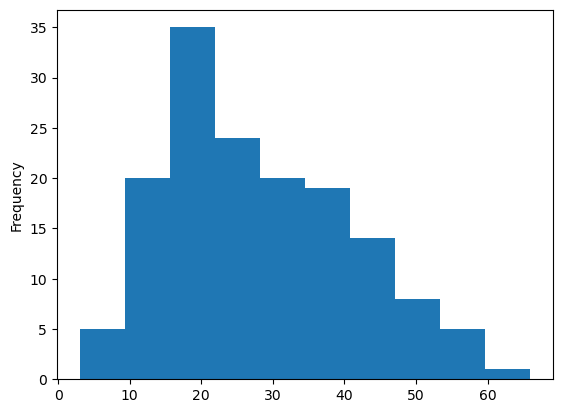

In [10]:
df['ClassSize'].plot(kind='hist')

<AxesSubplot:xlabel='Course', ylabel='count'>

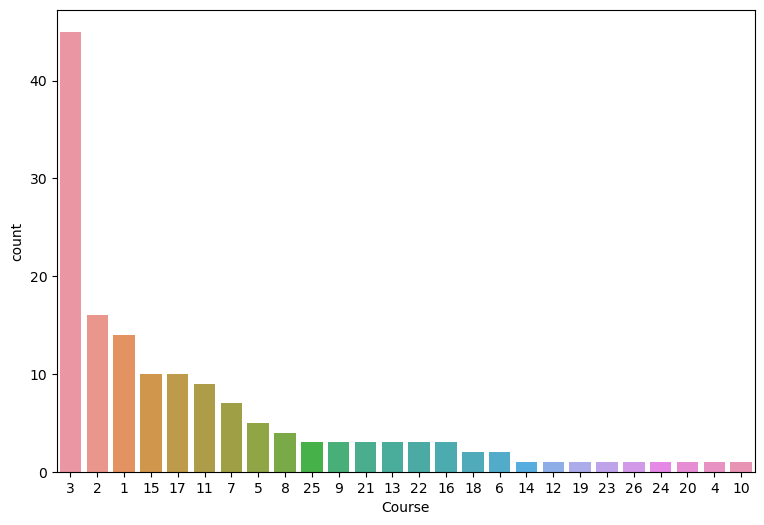

In [11]:
plt.figure(figsize=(9,6))
sns.countplot(x=df['Course'], order=df['Course'].value_counts().index)

<AxesSubplot:xlabel='Sum/Reg', ylabel='count'>

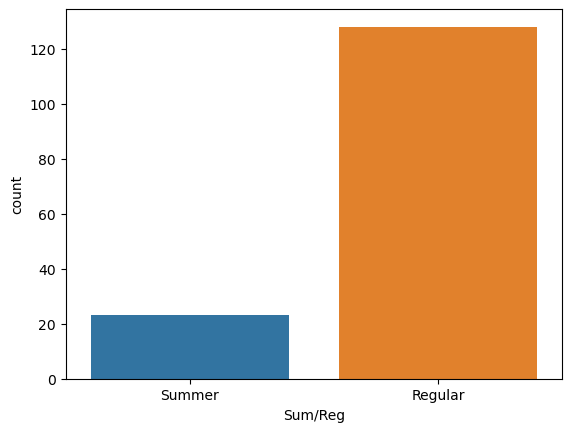

In [12]:
sns.countplot(x=df['Sum/Reg'])

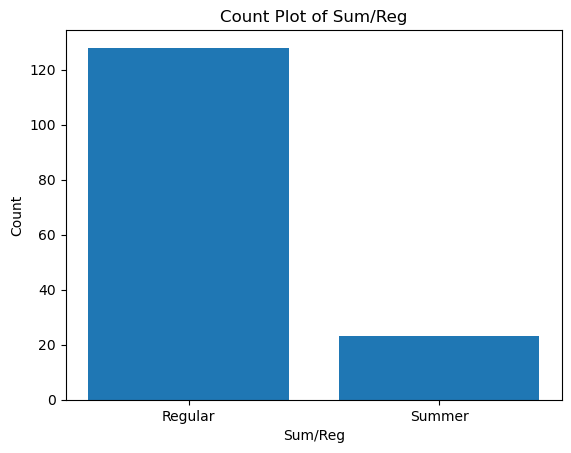

In [13]:
counts = df['Sum/Reg'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Sum/Reg')
plt.ylabel('Count')
plt.title('Count Plot of Sum/Reg')
plt.show()

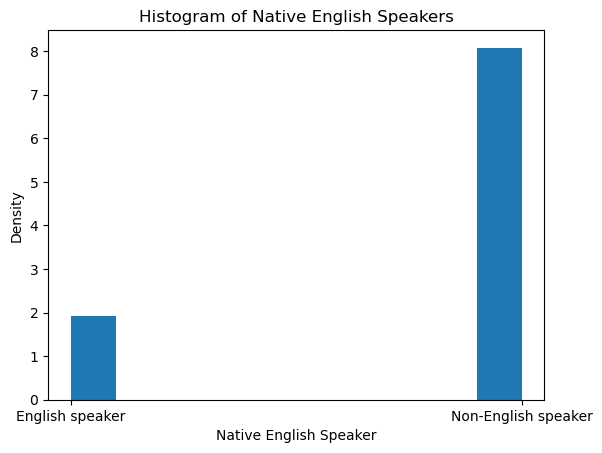

In [14]:
plt.hist(df['NativeEngSpeaker'], density=True)
plt.xlabel('Native English Speaker')
plt.ylabel('Density')
plt.title('Histogram of Native English Speakers')
plt.show()

<AxesSubplot:xlabel='NativeEngSpeaker', ylabel='Density'>

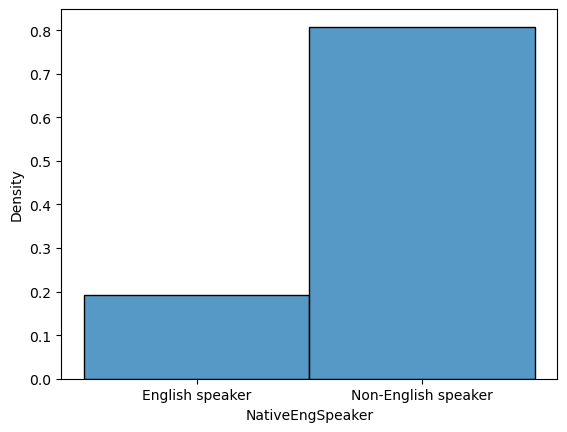

In [15]:
sns.histplot(x=df['NativeEngSpeaker'], stat='density')

<AxesSubplot:xlabel='ClassAttr', ylabel='count'>

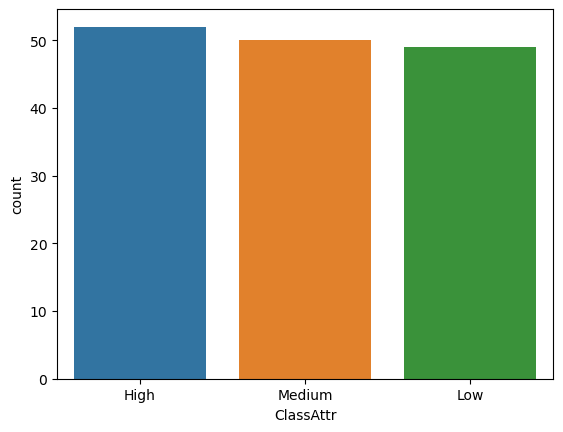

In [16]:
sns.countplot(x=df['ClassAttr'])

<AxesSubplot:xlabel='NativeEngSpeaker', ylabel='count'>

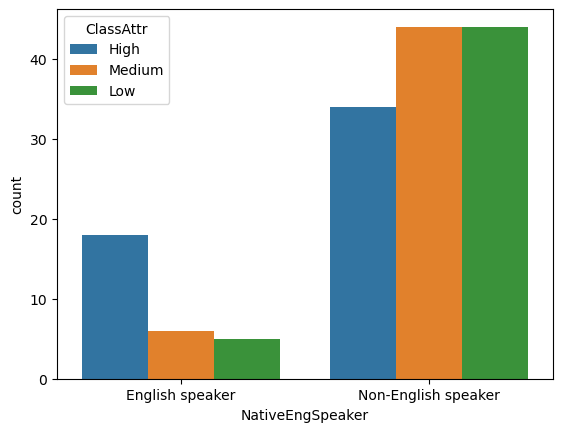

In [17]:
sns.countplot(x=df['NativeEngSpeaker'], hue=df['ClassAttr'])

In [18]:
def percentage(*col_name):
    arr = []
    for name in col_name:
        arr.append(name)
    
    data_frame = (df.groupby(arr).size() / df.groupby(arr[0]).size()).reset_index().rename({0:'Percent'}, axis=1)
#    data_frame = (df.groupby([col1_name, col2_name]).size() / df.groupby(col1_name).size()).reset_index().rename({0:'Percent'}, axis=1)
    return data_frame

In [19]:
speaker_status = percentage('NativeEngSpeaker', 'ClassAttr')

<AxesSubplot:xlabel='NativeEngSpeaker', ylabel='Percent'>

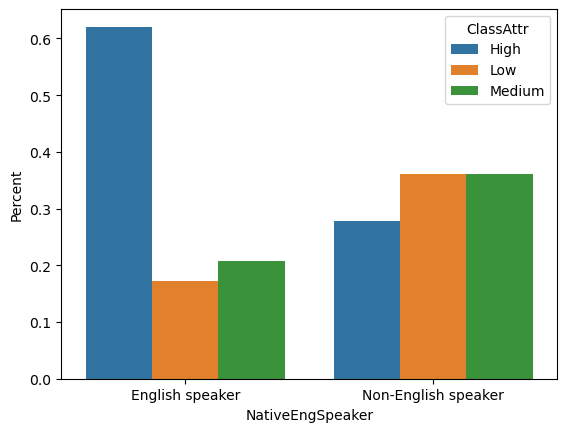

In [20]:
sns.barplot(data=speaker_status, x='NativeEngSpeaker', y='Percent', hue='ClassAttr')


In [40]:
ProfileReport(df)
pf = ProfileReport(df)
pf.to_widgets()
pf.to_file('test.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Logistic Regression

In [34]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load data
df = pd.read_csv("data.csv",names=['NativeEngSpeaker','CourseInst','Course', 'Sum/Reg', 'ClassSize', 'ClassAttr'])

# Preprocessing: Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['CourseInst', 'Course'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('ClassAttr', axis=1), df['ClassAttr'], test_size=0.2, random_state=41)

# Train a Logistic Regression classifier
lr = LogisticRegression(random_state=41, max_iter=1000)
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

Accuracy:  0.6129032258064516
Precision:  0.65284178187404
Recall:  0.6129032258064516
F1-Score:  0.6101867572156197


### SVM

In [37]:
# Import necessary libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load data
df = pd.read_csv("data.csv",names=['NativeEngSpeaker','CourseInst','Course', 'Sum/Reg', 'ClassSize', 'ClassAttr'])

# Preprocessing: Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['CourseInst', 'Course'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('ClassAttr', axis=1), df['ClassAttr'], test_size=0.2, random_state=41)

# Train an SVM classifier
svm = SVC(random_state=41)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

Accuracy:  0.2903225806451613
Precision:  0.08428720083246619
Recall:  0.2903225806451613
F1-Score:  0.1306451612903226


C:\Users\vinay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [36]:
#Random ZForest
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load data
df = pd.read_csv("data.csv",names=['NativeEngSpeaker','CourseInst','Course', 'Sum/Reg', 'ClassSize', 'ClassAttr'])

# Preprocessing: Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['CourseInst', 'Course'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('ClassAttr', axis=1), df['ClassAttr'], test_size=0.2, random_state=41)

# Train a Random Forest classifier
rfc = RandomForestClassifier(random_state=41)
rfc.fit(X_train, y_train)

# Predict on the test set
y_pred = rfc.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

Accuracy:  0.6774193548387096
Precision:  0.6931348221670803
Recall:  0.6774193548387096
F1-Score:  0.6760168302945301
